### Imports

!pip install -r requirements.txt

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

import plotly.express as px

from layers import Layer
from neural_network import NeuralNetwork

from utils import train_model, plot_training_history, readfile, sample_data, standardize_data, plot3d_data
from loss import cuadratic_loss

### Auxiliary Functions

### Load

In [3]:
data = readfile('datos_examen')

data.shape

(901, 5)

### Preprocess

In [4]:
std_data = standardize_data(data)

### Visualize

In [5]:
indices = [0, 1, 4]

plot3d_data(std_data, indices)

### Split

In [6]:
distribution = 'uniform'
train_size = 0.6

# Split data
train_array, val_test_array = sample_data(std_data, distribution, train_size)
val_array, test_array = sample_data(val_test_array, distribution, 0.5)

# Split features and labels
train_x = train_array[:, indices[:-1]]
train_y = train_array[:, indices[-1]].reshape(-1, 1)

val_x = val_array[:, indices[:-1]]
val_y = val_array[:, indices[-1]].reshape(-1, 1)

test_x = test_array[:, indices[:-1]]
test_y = test_array[:, indices[-1]].reshape(-1, 1)

### Define the Hyperparameters and Instance Model

In [37]:
LEARNING_RATE = 0.01
MODEL_LOSS = "cuadratic"
INCLUDE_BIAS = False

model = NeuralNetwork(
        [
            Layer(train_x.shape[1], 2, "sigmoid", INCLUDE_BIAS),
            Layer(2, 2, "sigmoid", INCLUDE_BIAS),
            Layer(2, train_y.shape[1], "sigmoid", INCLUDE_BIAS),
        ],
        LEARNING_RATE,
        MODEL_LOSS,
    )

### Train model during 1 epoch

In [38]:
N_ITER = train_x.shape[0]
BATCH_SIZE = 1

Epoch 1/1 | Loss: 0.5587509863296934
(541, 1)


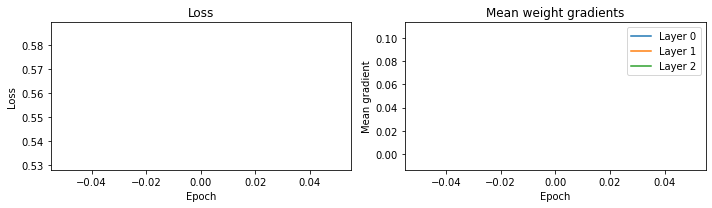

In [39]:
# Train model
trained_model_1_epoch, train_history_1_epoch = train_model(
    model, train_x, train_y, N_ITER, BATCH_SIZE, verbose=True
)

train_len = train_x.shape[0]

# Plot training history
plot_training_history(
    train_history_1_epoch,
    plot_by_epoch=True,
    train_len=train_len,
    savefig=True,
    figname='training_history_1_epoch'
)

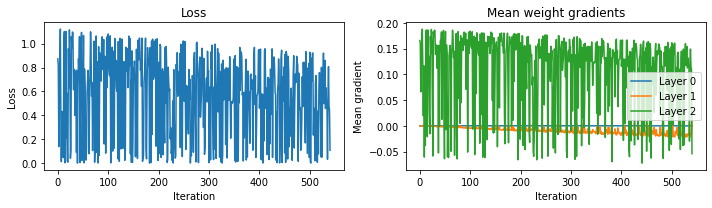

In [40]:
plot_training_history(
    train_history_1_epoch,
    plot_by_epoch=False,
    train_len=train_len,
    savefig=True,
    figname='training_history_1_epoch_by_iteration'
)

### Propagate and Evaluate

In [41]:
for x_array, y_array, dataset in zip([train_x, val_x, test_x], [train_y, val_y, test_y], ['Train', 'Val', 'Test']):
    y_pred = trained_model_1_epoch.predict(x_array)
    loss = cuadratic_loss(y_array.T, y_pred)
    print(f"{dataset} Loss: {np.mean(loss)}")

Train Loss: 0.4996425550040319
Val Loss: 0.46040924363389374
Test Loss: 0.499170199494804


### Train during 10 more epochs

In [45]:
N_ITER = train_x.shape[0]*1000

Epoch 1/1000 | Loss: 0.2948953325393722
Epoch 2/1000 | Loss: 0.29301038874466595
Epoch 3/1000 | Loss: 0.29145199197117033
Epoch 4/1000 | Loss: 0.2901454489467295
Epoch 5/1000 | Loss: 0.28903666473640394
Epoch 6/1000 | Loss: 0.2880856256107311
Epoch 7/1000 | Loss: 0.2872621753550695
Epoch 8/1000 | Loss: 0.28654320603560474
Epoch 9/1000 | Loss: 0.2859107456207603
Epoch 10/1000 | Loss: 0.28535062864978933
Epoch 11/1000 | Loss: 0.28485155459724054
Epoch 12/1000 | Loss: 0.28440440936680195
Epoch 13/1000 | Loss: 0.2840017687276788
Epoch 14/1000 | Loss: 0.28363752971235395
Epoch 15/1000 | Loss: 0.283306633421489
Epoch 16/1000 | Loss: 0.28300485406369635
Epoch 17/1000 | Loss: 0.28272863662591374
Epoch 18/1000 | Loss: 0.28247497068590044
Epoch 19/1000 | Loss: 0.28224129138974
Epoch 20/1000 | Loss: 0.2820254010617307
Epoch 21/1000 | Loss: 0.28182540663838473
Epoch 22/1000 | Loss: 0.28163966934961504
Epoch 23/1000 | Loss: 0.2814667639596309
Epoch 24/1000 | Loss: 0.281305445529468
Epoch 25/1000 | 

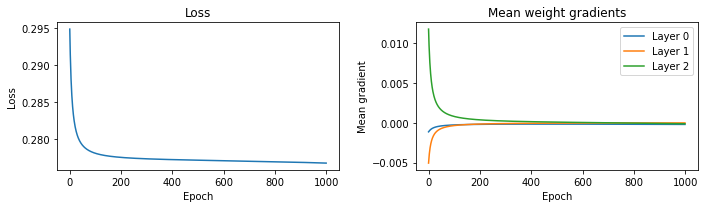

In [46]:
# Train model
trained_model_11_epoch, train_history_10_epoch = train_model(
    trained_model_1_epoch, train_x, train_y, N_ITER, BATCH_SIZE, verbose=True
)

# Plot training history
plot_training_history(
    train_history_10_epoch,
    plot_by_epoch=True,
    train_len=train_len,
    savefig=True,
    figname='training_history_10_epoch'
)

### Propagate and Evaluate

In [44]:
for x_array, y_array, dataset in zip([train_x, val_x, test_x], [train_y, val_y, test_y], ['Train', 'Val', 'Test']):
    y_pred = trained_model_11_epoch.predict(x_array)
    loss = cuadratic_loss(y_array.T, y_pred)
    print(f"{dataset} Loss: {np.mean(loss)}")

Train Loss: 0.29596560787379006
Val Loss: 0.2853708338635397
Test Loss: 0.2869286850261326


### Final Questions

#### Why the loss is not zero?

The model has not been trained for enough epochs. Also, the model may not be complex enough to perfectly model the data, this can be observed by augmenting the number of epochs in which it is trained and watching if the gradients of all the layers converge to zero (the model stops learning) before the loss converging to zero.

#### Did the Neural Network learned?

Yes it did, the last plot shows that the loss is monotonicly decreasing. It is worth noting that the first layer do not learn much more after the first five iterations, however, the output layer still learns.